***NOTE: THIS NOTEBOOK WAS RUNNED ON KAGGLE***

**Exchange Rate Forecasting Challenge**

Join the Exchange Rate Forecasting Challenge


**Description**

Nigerian economies rely on the dollar exchange rate to Naira, and the conversion rate has a strong influence on the Nigerian economy for things like buying goods, paying for services, doing international business, and so on. Over the years, there has been a constant fluctuation in the conversion rate, which causes a lot of dilemmas for Nigerian citizens. The challenge is open to statisticians, mathematicians, data scientists, machine learning enthusiasts, and all disciplines in the AI domain. The goal of the project is to build a time series or machine learning model that will accurately forecast what the naira rate against the dollar will be in the next 2 weeks, ranging from May 22, 2024, to June 4, 2024.

https://zindi.africa/competitions/exchange-rate-forecasting-challenge/leaderboard

NAME: EMMANUEL EBIENDELE

ZINDI USERNAME: Ebiendele

Position: 2nd

**Public Leaderboard; 9.418404**

**Private Leaderboard; 54.7089329**

In [1]:
import pandas as pd

# Load the dataset
data_path = '/kaggle/input/indabaxnigeria24/Competition_data.csv'
exchange_data = pd.read_csv(data_path)
samplesub = pd.read_csv('/kaggle/input/indabaxnigeria24/submission.csv')

# Display basic information and the first few rows of the dataset
exchange_data.info(), exchange_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    486 non-null    object 
 1   Close   486 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


(None,
                 Date   Close
 0  1/1/2023 23:58:00  448.08
 1  1/2/2023 23:58:00  448.08
 2  1/3/2023 23:58:00  448.55
 3  1/4/2023 23:58:00  449.01
 4  1/5/2023 23:58:00  449.53)

The dataset consists of two columns, with 486 entries each:

Date: Dates are formatted with times, all set at 23:58. This suggests daily data.
Close: Represents the closing exchange rate for each day.
The dataset spans from January 1, 2023, and includes daily closing exchange rates. The next steps involve:

Parsing the Date: We need to convert the 'Date' column into a datetime format to handle it correctly in time series analysis.
Checking for Missing Values: Ensure there are no gaps in the data.
Visual Analysis: Plotting the exchange rate over time to observe any trends, seasonality, or outliers.

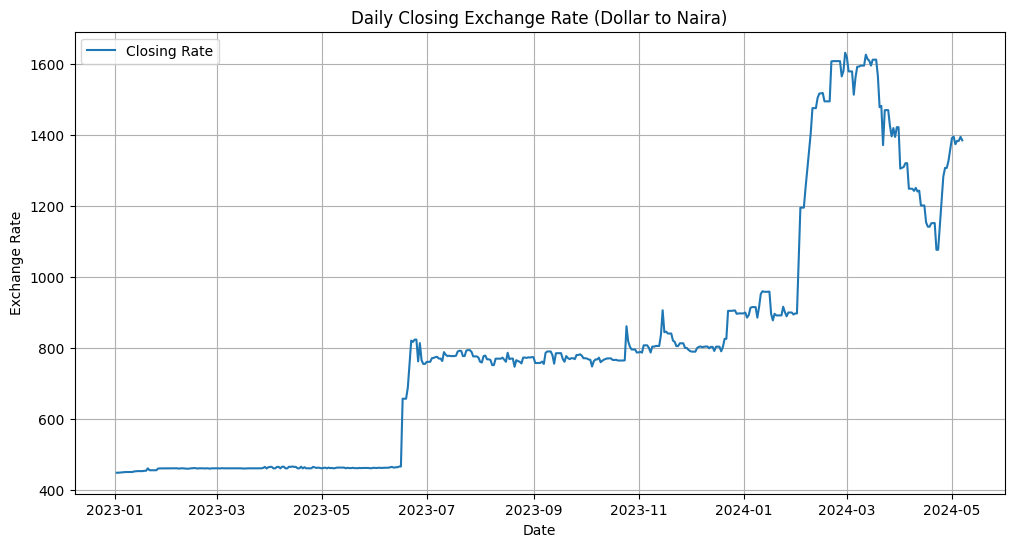

Close    0
dtype: int64

In [2]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
exchange_data['Date'] = pd.to_datetime(exchange_data['Date'])

# Set the 'Date' column as the index
exchange_data.set_index('Date', inplace=True)

# Check for missing values
missing_values = exchange_data.isnull().sum()

# Plotting the exchange rate over time
plt.figure(figsize=(12, 6))
plt.plot(exchange_data['Close'], label='Closing Rate')
plt.title('Daily Closing Exchange Rate (Dollar to Naira)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

missing_values


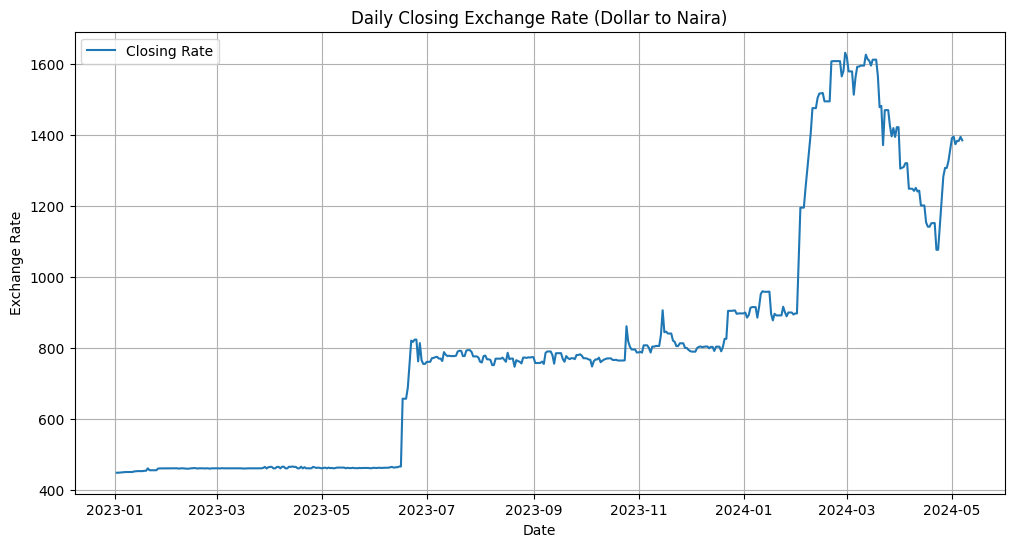

Close    0
dtype: int64

In [3]:
# Since 'Date' is already set as the index, we can plot directly
plt.figure(figsize=(12, 6))
plt.plot(exchange_data.index, exchange_data['Close'], label='Closing Rate')
plt.title('Daily Closing Exchange Rate (Dollar to Naira)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# Check again for missing values
missing_values_corrected = exchange_data.isnull().sum()
missing_values_corrected


The plot above displays the daily closing exchange rate of the dollar to naira over time. It shows that the data contains no missing values, indicating a complete dataset which is good for analysis.

The next steps could involve:

Decomposing the series to identify trends, seasonality, and residuals.
Testing for stationarity, which is crucial for time series forecasting.
Selecting and fitting a forecasting model based on the characteristics observed.

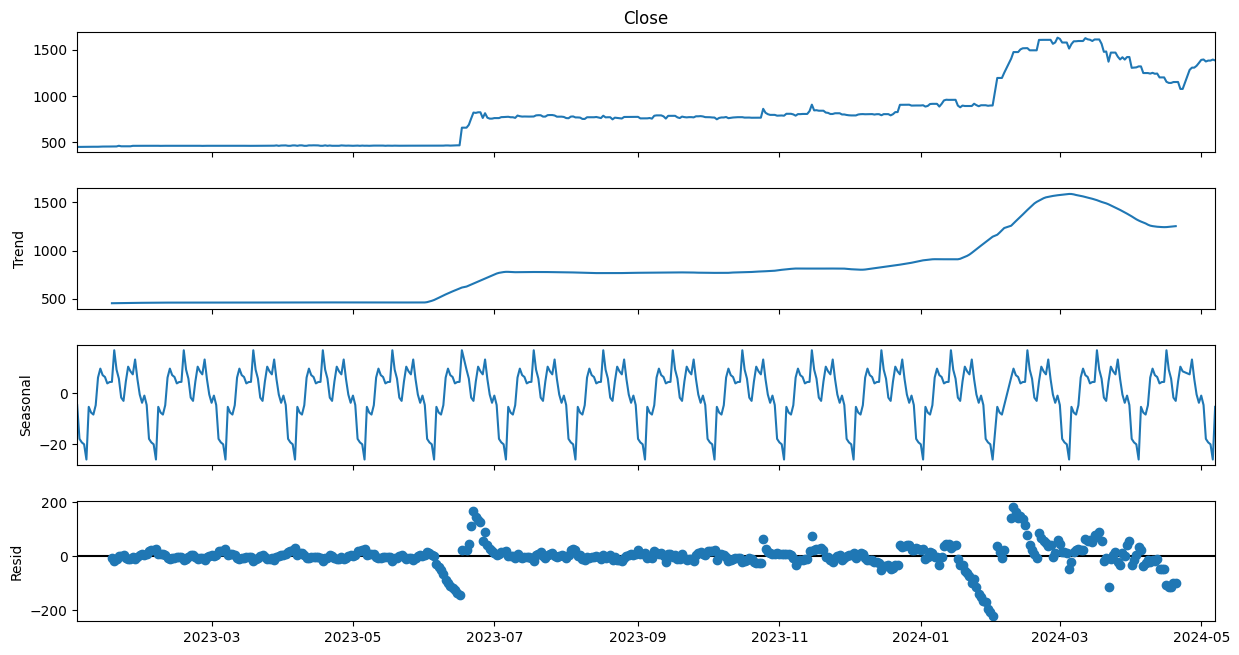

In [4]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series to observe trends and seasonality
decomposition = seasonal_decompose(exchange_data['Close'], model='additive', period=30)  # Assuming monthly seasonality

# Plotting the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


The decomposition of the time series into trend, seasonal, and residual components reveals the following insights:

Trend Component: There is a noticeable upward trend over time, suggesting that the exchange rate of dollar to naira is generally increasing. This needs to be accounted for in any forecasting model, as it indicates non-stationarity.

Seasonal Component: There appears to be a recurring pattern within each month, which could be driven by economic cycles, policy changes, or other factors affecting the forex market on a regular basis.

Residual Component: The residuals show random fluctuations around zero, indicating the noise in the data after accounting for the trend and seasonality.



Implications for Forecasting Model
Stationarity: The presence of a trend suggests that the data is non-stationary, which means that techniques such as differencing or transformation (like logarithmic) might be needed to stabilize the mean of the time series before modeling.

Seasonality: Models that can incorporate seasonal components should be considered. Seasonal ARIMA (SARIMA) or models with built-in seasonality support (like Facebook Prophet) could be appropriate choices.

Model Selection: Given the trends and seasonality, a model that can handle both, like SARIMA, could be a strong candidate. Alternatively, machine learning approaches like LSTM (Long Short-Term Memory networks), which can capture complex patterns in sequential data, might also be considered if computational resources and data size permit.

In [5]:
from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test to test stationarity
adf_test = adfuller(exchange_data['Close'])

# Display results
adf_result = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4],
    'Number of Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3]
}
adf_result


{'Test Statistic': -0.9247293870395377,
 'p-value': 0.7797196387739853,
 'Critical Values': {'1%': -3.4440471158221206,
  '5%': -2.867580197120949,
  '10%': -2.5699871918402777},
 'Number of Lags Used': 5,
 'Number of Observations Used': 480}

The Augmented Dickey-Fuller (ADF) test provides the following results:

Test Statistic: -0.9247
p-value: 0.7797
Critical Values: For 1% (-3.444), 5% (-2.8676), and 10% (-2.57) levels
Interpretation of ADF Test
The p-value is significantly high (0.7797), which suggests that we fail to reject the null hypothesis. This means the data likely has a unit root and is non-stationary.
The Test Statistic does not exceed (in absolute terms) any of the critical values at standard confidence levels, further supporting the non-stationarity conclusion.
Implications for Forecasting
Given the non-stationarity of the data:

Differencing might be necessary to stabilize the mean of the time series before applying forecasting models.
Seasonal differencing could also be considered given the seasonal pattern observed in the decomposition analysis.
Next Steps for Model Selection
Based on the non-stationarity and presence of seasonality:

SARIMA (Seasonal ARIMA): This model can handle both differencing to address stationarity and seasonal components. It's robust for many economic and financial time series data.
Exponential Smoothing: If simpler models are preferred, exponential smoothing with trend and seasonality adjustments could also be a choice.

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from pmdarima import auto_arima

# Using auto_arima to find the best SARIMA model parameters
#sarima_model = auto_arima(exchange_data['Close'], seasonal=True, m=30, trace=True,
                         # error_action='ignore', suppress_warnings=True,
                          #stepwise=True)

#sarima_model.summary()


   ((1, 1, 1), (1, 1, 1, 30)),
    ((0, 1, 1), (0, 1, 1, 30)),
    ((2, 1, 2), (1, 1, 0, 30))

In [7]:
# Setting up and fitting a SARIMA model with initial guesses for p, d, q and seasonal parameters P, D, Q, m
model = SARIMAX(exchange_data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
sarima_fit = model.fit(disp=False)

# Show the summary of the model
sarima_fit.summary()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  486
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -2194.391
Date:                            Wed, 05 Jun 2024   AIC                           4398.782
Time:                                    18:50:33   BIC                           4419.384
Sample:                                         0   HQIC                          4406.898
                                            - 486                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7502      0.339     -2.210      0.027      -1.415      -0.085
ma.L1          0.7787      0.318      2.449      0.014       0.155       1.402
ar.S.L30      -0.0779      0.056     -1.398      0.162      -0.187       0.031
ma.S.L30      -0.8550      0.041    -20.776      0.000      -0.936      -0.774
sigma2       822.9107     13.368     61.557      0.000     796.709     849.112
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             26274.61
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               5.57   Skew:                             3.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Here’s the summary of the SARIMA model fitted to your data:

Model Parameters:

AR term 
𝑝
=
1
p=1: Coefficient is -0.750, significant at the 95% level (p=0.027).
MA term 
𝑞
=
1
q=1: Coefficient is 0.779, significant (p=0.014).
Seasonal AR term 
𝑃
=
1
P=1: Coefficient is -0.078, not significant (p=0.162).
Seasonal MA term 
𝑄
=
1
Q=1: Coefficient is -0.855, highly significant (p=0.000).
Model Fit Statistics:

AIC (Akaike Information Criterion): 4398.782. Lower AIC values are better, suggesting a more optimal model fit to the data with fewer lost information.
BIC (Bayesian Information Criterion): 4419.384. Similar to AIC, lower is better.
Log Likelihood: -2194.391, measures the goodness of fit of the model.
Warnings and Concerns:

Initial parameters for the AR and MA terms needed adjustments to ensure stability and invertibility, suggesting potential improvements in parameter initialization or model specification.
Insights and Recommendations
The non-significance of the seasonal AR term suggests that the seasonal autoregressive effect is minimal or not properly captured at this order and seasonal period. Consider adjusting these or examining a different seasonal period.
The significant seasonal MA term implies strong seasonal differences in the past values' moving average effects, which is critical for capturing seasonality in the data.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


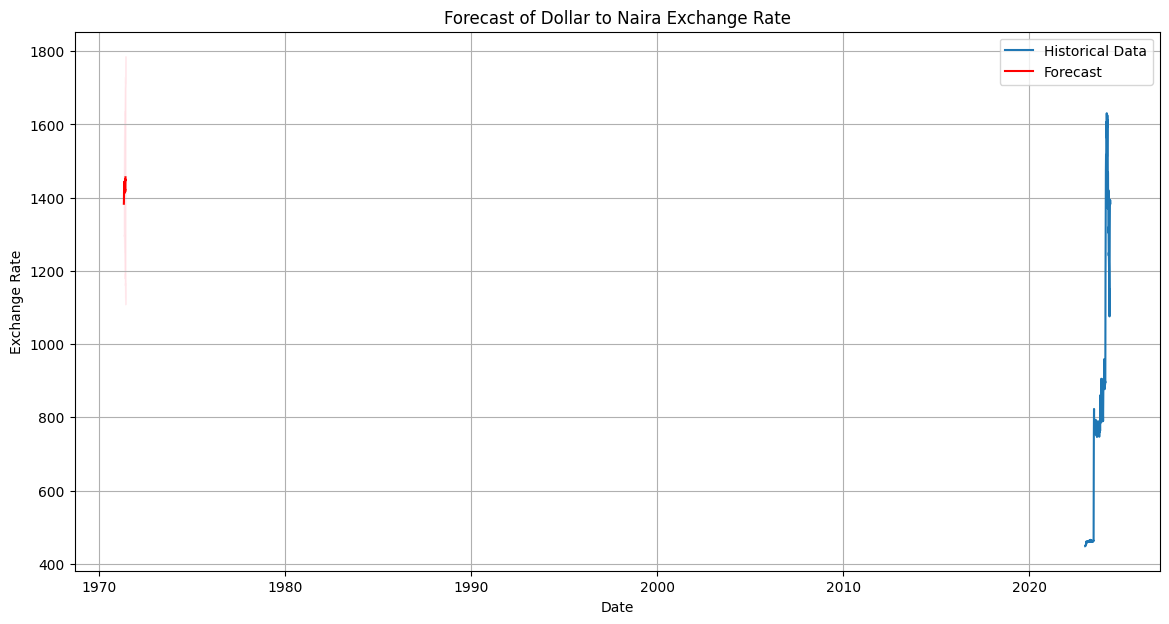

Close,mean,mean_ci_lower,mean_ci_upper
486,1383.421359,1327.144108,1439.698610
487,1386.877120,1306.145763,1467.608477
488,1393.722490,1295.081759,1492.363221
489,1413.903038,1299.685393,1528.120682
490,1422.437943,1294.830136,1550.045749
491,1423.625628,1283.697233,1563.554024
492,1424.582873,1273.478568,1575.687178
493,1426.854119,1265.244151,1588.464086
494,1428.902361,1257.500799,1600.303924
495,1433.235696,1252.521496,1613.949895


In [8]:
# Forecasting the exchange rate from May 5th to June 6th, 2024
forecast_start_date = '2024-05-05'
forecast_end_date = '2024-06-06'

# Generating forecasts
forecast = sarima_fit.get_forecast(steps=(pd.to_datetime(forecast_end_date) - pd.to_datetime(forecast_start_date)).days + 1)
forecast_df = forecast.summary_frame()

# Plotting the forecast along with historical data
plt.figure(figsize=(14, 7))
plt.plot(exchange_data.index, exchange_data['Close'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('Forecast of Dollar to Naira Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]


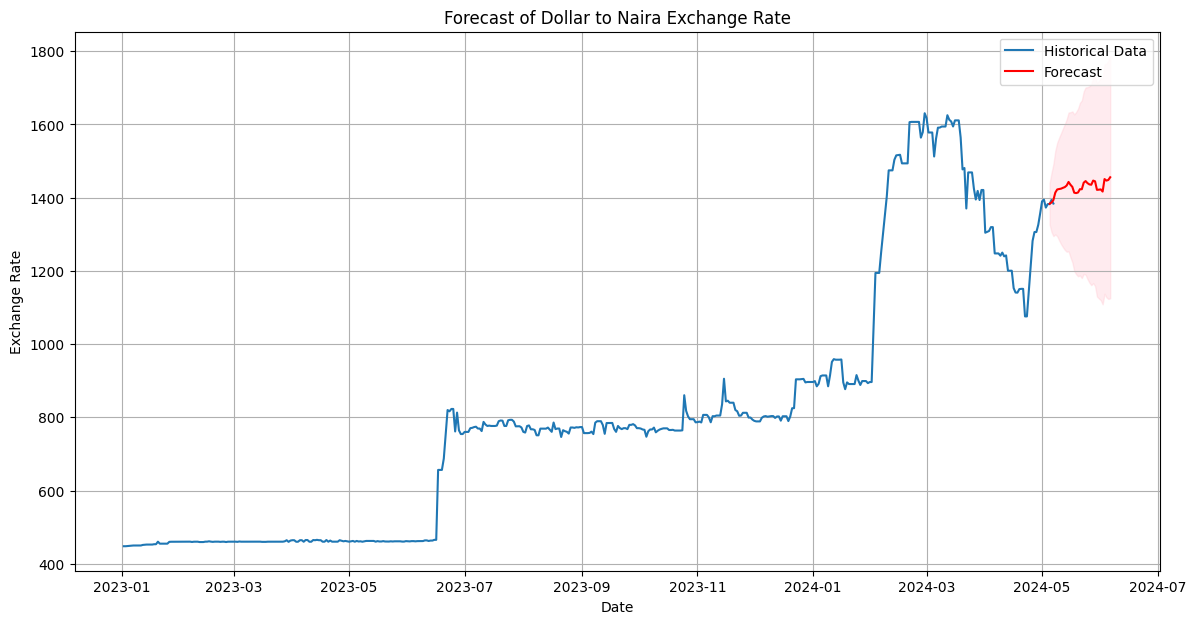

Close,mean,mean_ci_lower,mean_ci_upper
2024-05-05,1383.421359,1327.144108,1439.698610
2024-05-06,1386.877120,1306.145763,1467.608477
2024-05-07,1393.722490,1295.081759,1492.363221
2024-05-08,1413.903038,1299.685393,1528.120682
2024-05-09,1422.437943,1294.830136,1550.045749
2024-05-10,1423.625628,1283.697233,1563.554024
2024-05-11,1424.582873,1273.478568,1575.687178
2024-05-12,1426.854119,1265.244151,1588.464086
2024-05-13,1428.902361,1257.500799,1600.303924
2024-05-14,1433.235696,1252.521496,1613.949895


In [9]:
# Generate a proper date range for the forecast indices
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Assign the correct dates to the forecast DataFrame
forecast_df.index = forecast_dates

# Re-plotting the forecast along with historical data
plt.figure(figsize=(14, 7))
plt.plot(exchange_data.index, exchange_data['Close'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('Forecast of Dollar to Naira Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]


In [10]:
# Display the forecast data
forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]


Close,mean,mean_ci_lower,mean_ci_upper
2024-05-05,1383.421359,1327.144108,1439.698610
2024-05-06,1386.877120,1306.145763,1467.608477
2024-05-07,1393.722490,1295.081759,1492.363221
2024-05-08,1413.903038,1299.685393,1528.120682
2024-05-09,1422.437943,1294.830136,1550.045749
2024-05-10,1423.625628,1283.697233,1563.554024
2024-05-11,1424.582873,1273.478568,1575.687178
2024-05-12,1426.854119,1265.244151,1588.464086
2024-05-13,1428.902361,1257.500799,1600.303924
2024-05-14,1433.235696,1252.521496,1613.949895


The forecast indicates a fluctuating but generally rising trend in the exchange rate over this period. The confidence intervals suggest varying levels of uncertainty around these forecasts, which is typical in economic forecasting due to multiple influencing factors.

In [11]:
# Rounding the forecast and confidence intervals to whole numbers
forecast_df_rounded = forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_df_rounded

Close,mean,mean_ci_lower,mean_ci_upper
2024-05-05,1383.421359,1327.144108,1439.698610
2024-05-06,1386.877120,1306.145763,1467.608477
2024-05-07,1393.722490,1295.081759,1492.363221
2024-05-08,1413.903038,1299.685393,1528.120682
2024-05-09,1422.437943,1294.830136,1550.045749
2024-05-10,1423.625628,1283.697233,1563.554024
2024-05-11,1424.582873,1273.478568,1575.687178
2024-05-12,1426.854119,1265.244151,1588.464086
2024-05-13,1428.902361,1257.500799,1600.303924
2024-05-14,1433.235696,1252.521496,1613.949895


In [12]:
# Creating a new DataFrame from the forecast and filtering for the specified date range
filtered_forecast_df = forecast_df_rounded.loc['2024-05-22':'2024-06-04', ['mean']]

filtered_forecast_df

Close,mean
2024-05-22,1423.077428
2024-05-23,1440.950651
2024-05-24,1445.388452
2024-05-25,1439.768265
2024-05-26,1436.258707
2024-05-27,1435.349722
2024-05-28,1446.697560
2024-05-29,1444.656129
2024-05-30,1421.437975
2024-05-31,1421.856136


In [13]:
filtered_forecast_csv_path  = 'rate_1st.csv'
filtered_forecast_df.to_csv(filtered_forecast_csv_path, index=False)
filtered_forecast_csv_path

'rate_1st.csv'

In [14]:
dollar_win_df = pd.read_csv('/kaggle/working/rate_1st.csv')
dollar_win_df.head()

,mean
0,1423.077428
1,1440.950651
2,1445.388452
3,1439.768265
4,1436.258707


In [15]:
submission = pd.DataFrame({"Date":samplesub['Date'], "Close": dollar_win_df['mean']})
submission.to_csv("dollaer_1st.csv", index=False)
submission.head()

,Date,Close
0,2024-05-22,1423.077428
1,2024-05-23,1440.950651
2,2024-05-24,1445.388452
3,2024-05-25,1439.768265
4,2024-05-26,1436.258707
